# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Adeyemi Toba

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list
print('All prereqs installed.')

Package                   Version
------------------------- ---------------
annotated-types           0.6.0
anyio                     4.2.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.1
confection                0.1.4
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing    

## Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests

# URL of the article
url = "https://www.cnn.com/2013/07/30/world/nato-fast-facts/index.html/"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the webpage
    html_content = response.text
    
    # Save the HTML content to a file
    with open("article.html", "w", encoding="utf-8") as f:
        f.write(html_content)
        
    print("Article HTML content has been saved to 'article.html'")
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

Article HTML content has been saved to 'article.html'


In [6]:
from bs4 import BeautifulSoup

# Read the HTML content from the saved file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse HTML and extract plain text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Save plain text to a new file
with open('article.txt', 'w', encoding='utf-8') as file:
    file.write(article_text)

print("Article content has been saved to 'article.txt'")

Article content has been saved to 'article.txt'


In [7]:
import requests
url = "https://www.cnn.com/2013/07/30/world/nato-fast-facts/index.html/"

response = requests.get("https://www.cnn.com/2013/07/30/world/nato-fast-facts/index.html/")

print(response.status_code)
print(response.headers['content-type'])

200
text/html; charset=utf-8


In [8]:
import requests
from bs4 import BeautifulSoup
import pickle
url = "https://www.cnn.com/2013/07/30/world/nato-fast-facts/index.html/"

# parser = 'html5lib'
parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)

article_page = requests.get(url)
article_html = article_page.text



with open('article.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Load the pickled data
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

    soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')

# Print the pickled data
print(article_element)

<article class="article" data-regwall-disabled="false" data-unselectable="true" data-uri="archive.cms.cnn.com/_components/article/instances/h_630e6875383c02ed2afd65dee9a0a8e2@published" role="main">
<script>
          window.CNN.contentModel.leadingMediaType = 'image';
          window.CNN.contentModel.isVideoCollection = false;
      </script>
<section class="body tabcontent active" data-tabcontent="Content">
<main class="article__main">
<div class="image__lede article__lede-wrapper" data-editable="lede" data-freewheel-lede="true">
<div class="image image__hide-placeholder" data-breakpoints='{"image--eq-extra-small": 115, "image--eq-small": 300}' data-component-name="image" data-editable="settings" data-image-variation="image" data-name="NATO Flag" data-observe-resizes="" data-original-height="1729" data-original-ratio="0.6667952178943309" data-original-width="2593" data-uri="archive.cms.cnn.com/_components/image/instances/lede-2726698609203c2630860b987ece667f@published" data-url="htt

In [9]:
from bs4 import BeautifulSoup
import pickle

# Read the HTML content from the file
with open("article.pkl", "rb") as f:
    html_content = pickle.load(f)

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Find the article element
article_element = soup.find("article")

# Get the text from the article element
article_text = article_element.get_text()

# Print the text
print(article_text)













NATO flag at the NATO headquarters in Brussels

KENZO TRIBOUILLARD/AFP/AFP via Getty Images








CNN
         — 
    


            Here’s a look at the North Atlantic Treaty Organization (NATO), headquartered in Brussels, Belgium.
    

    Facts


            The organization’s charter states that the signing parties will “seek to promote stability and well-being in the North Atlantic area,” and will “unite their efforts for collective defense and for the preservation of peace and security.”
    

April 4, 1949 - NATO is established.
    

2014-present - The current secretary general is Jens Stoltenberg, former prime minister of Norway. On March 24, 2022, Stoltenberg’s tenure was extended by one year due to Russia’s invasion of Ukraine.
    

March 14, 2024 - The secretary general’s annual report is released.
    

    32 Member Countries


            Albania (2009)Belgium (1949)Bulgaria (2004)Canada (1949)Croatia (2009)Czech Republic (1999)Denmark (1949)Estonia (2004

## Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [10]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
from textblob import TextBlob

# Calculate polarity score by using nlp
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
print(f'Polarity: {doc._.polarity}')

# calculate polarity score by using blob
# Perform sentiment analysis
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Count the number of sentences
num_sentences = len(blob.sentences)

# Print the polarity score and number of sentences
print("Sentiment Polarity Score:", polarity_score)
print("Number of Sentences:", num_sentences)

Polarity: 0.035361187633914895
Sentiment Polarity Score: 0.035361187633914895
Number of Sentences: 75


## Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [11]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
doc = nlp(article_element.get_text())
from collections import Counter

def important_token(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if important_token(token)]
word_freq = Counter(map(str,interesting_tokens))
best_token = (word_freq.most_common(5))

## Print the common tokens with an appropriate label
print("Tokens and Their Frequencies :")
print(best_token)
best_tokens = set()
for token, freq in word_freq.most_common(5):
    best_tokens.add(token)
 ## Print 5 Most Frequent tokens
print("5 Most Frequent tokens : ", best_tokens)

Tokens and Their Frequencies :
[('nato', 66), ('march', 13), ('states', 11), ('russia', 9), ('united', 9)]
5 Most Frequent tokens :  {'russia', 'nato', 'united', 'march', 'states'}


## Question 4

4.Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels).

In [19]:
interesting_lemmas = [token.lemma_.lower() for token in doc if important_token(token)]
lemma_freq = Counter(interesting_lemmas)
best_lemmas= lemma_freq.most_common(5)

# Print lemmas and their frequencies
print("Lemmas and Their Frequencies :")
print(best_lemmas)
best_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    best_lemmas.add(lemma)
    
# Print the set of the 5 most frequent lemmas
print("5 Most Frequent Lemmas ", best_lemmas)

Lemmas and Their Frequencies :
[('nato', 66), ('march', 13), ('join', 11), ('russia', 9), ('states', 9)]
5 Most Frequent Lemmas  {'join', 'russia', 'nato', 'march', 'states'}


## Question 5

5.Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [20]:
sentences = list(doc.sents) # Finds score for each sentence
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1+= 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)

0.0967741935483871 : NATO flag at the NATO headquarters in BrusselsKENZO TRIBOUILLARD/AFP/AFP via Getty ImagesCNN     —         Here’s a look at the North Atlantic Treaty Organization (NATO), headquartered in Brussels, Belgium.    
0.023809523809523808 : Facts      The organization’s charter states that the signing parties will “seek to promote stability and well-being in the North Atlantic area,” and will “unite their efforts for collective defense and for the preservation of peace and security.”  April 4, 1949 -
0.3333333333333333 : NATO is established.  
0.0 : 2014-present - The current secretary general is Jens Stoltenberg, former prime minister of Norway.
0.10526315789473684 : On March 24, 2022, Stoltenberg’s tenure was extended by one year due to Russia’s invasion of Ukraine.  
0.3333333333333333 : March 14, 2024 -
0.0 : The secretary general’s annual report is released.    
0.020833333333333332 : 32 Member Countries      Albania (2009)Belgium (1949)Bulgaria (2004)Canada (1949)Cr

In [21]:
tscores = []
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1 += 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    score = count1 / count2 if count2 > 0 else 0
    tscores.append(score)

print("TokensLIST =", tscores)

TokensLIST = [0.0967741935483871, 0.023809523809523808, 0.3333333333333333, 0.0, 0.10526315789473684, 0.3333333333333333, 0.0, 0.020833333333333332, 0.1, 0.09090909090909091, 0.0, 0.0, 0.14285714285714285, 0.10714285714285714, 0.0, 0.06666666666666667, 0.0, 0.14285714285714285, 0.0, 0.05555555555555555, 0.0, 0.1276595744680851, 0.14814814814814814, 0.14285714285714285, 0.0967741935483871, 0.06666666666666667, 0.09090909090909091, 0.0, 0.0, 0.047619047619047616, 0.05263157894736842, 0.0, 0.0, 0.06666666666666667, 0.1111111111111111, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.13043478260869565, 0.11764705882352941, 0.0, 0.1111111111111111, 0.23809523809523808, 0.03278688524590164, 0.125, 0.09523809523809523, 0.03571428571428571, 0.10526315789473684, 0.043478260869565216, 0.0, 0.09302325581395349, 0.06666666666666667, 0.125, 0.0625, 0.045454545454545456, 0.08695652173913043, 0.08333333333333333, 0.0, 0.047619047619047616, 0.0, 0.2, 0.1111111111111111, 0.058823529411764705, 0.3333333333333

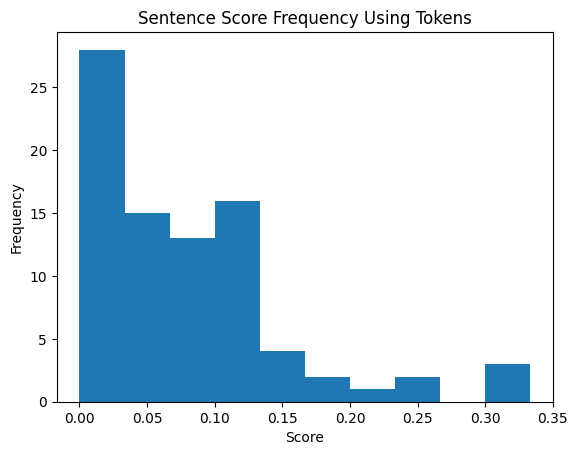

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Plot histogram
plt.hist(tscores)
plt.title('Sentence Score Frequency Using Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

## Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [24]:
sentences = list(doc.sents)
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in best_lemmas:
            count1+= 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)

0.0967741935483871 : NATO flag at the NATO headquarters in BrusselsKENZO TRIBOUILLARD/AFP/AFP via Getty ImagesCNN     —         Here’s a look at the North Atlantic Treaty Organization (NATO), headquartered in Brussels, Belgium.    
0.0 : Facts      The organization’s charter states that the signing parties will “seek to promote stability and well-being in the North Atlantic area,” and will “unite their efforts for collective defense and for the preservation of peace and security.”  April 4, 1949 -
0.3333333333333333 : NATO is established.  
0.0 : 2014-present - The current secretary general is Jens Stoltenberg, former prime minister of Norway.
0.10526315789473684 : On March 24, 2022, Stoltenberg’s tenure was extended by one year due to Russia’s invasion of Ukraine.  
0.3333333333333333 : March 14, 2024 -
0.0 : The secretary general’s annual report is released.    
0.020833333333333332 : 32 Member Countries      Albania (2009)Belgium (1949)Bulgaria (2004)Canada (1949)Croatia (2009)Czech

In [25]:
# Initialize list to store lemma scores
lscores = []

# Loop through each sentence to calculate lemma scores
for sentence in sentences:
    count1 = 0
    for token in sentence:
        if token.lemma_.lower() in best_lemmas:
            count1 += 1
    
    count2 = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count2 += 1
    
    # Calculate lemma score for the sentence
    score = count1 / count2 if count2 > 0 else 0
    lscores.append(score)

# Print the list of lemma scores
print("LemmasLIST =", lscores)

LemmasLIST = [0.0967741935483871, 0.0, 0.3333333333333333, 0.0, 0.10526315789473684, 0.3333333333333333, 0.0, 0.020833333333333332, 0.03333333333333333, 0.09090909090909091, 0.0, 0.0, 0.14285714285714285, 0.10714285714285714, 0.0, 0.06666666666666667, 0.0, 0.2857142857142857, 0.0, 0.1111111111111111, 0.0, 0.0851063829787234, 0.1111111111111111, 0.14285714285714285, 0.0967741935483871, 0.13333333333333333, 0.09090909090909091, 0.0, 0.0, 0.047619047619047616, 0.05263157894736842, 0.0, 0.0, 0.06666666666666667, 0.1111111111111111, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.13043478260869565, 0.11764705882352941, 0.0, 0.07407407407407407, 0.23809523809523808, 0.03278688524590164, 0.0625, 0.09523809523809523, 0.03571428571428571, 0.05263157894736842, 0.043478260869565216, 0.0, 0.09302325581395349, 0.1, 0.0, 0.0625, 0.045454545454545456, 0.13043478260869565, 0.08333333333333333, 0.1111111111111111, 0.047619047619047616, 0.0, 0.2, 0.1111111111111111, 0.058823529411764705, 0.3333333333333333, 

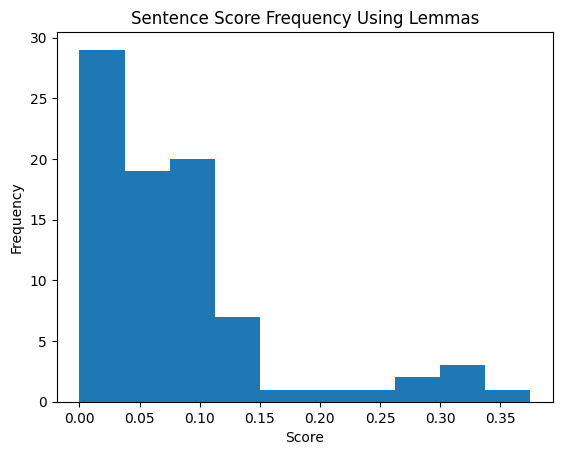

In [26]:
# Plot histogram
plt.hist(lscores)
plt.title('Sentence Score Frequency Using Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

## Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.12
* Cutoff Score (lemmas): 0.11

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [27]:
## To calculate the ideal cutoff score for tokens, the Percentile was used.
import numpy as np

# Convert the list of sentiment scores to a numpy array for easier calculation
scores_array = np.array(tscores)

# Calculate the cutoff score as the 25th percentile
cutoff_score_tokens = np.percentile(scores_array, 80)

print("Cutoff Score (tokens):", cutoff_score_tokens)

Cutoff Score (tokens): 0.12058823529411769


In [28]:
## To calculate the ideal cutoff score for lammas, the Percentile was used.
import numpy as np

# Convert the list of sentiment scores to a numpy array for easier calculation
scores_array = np.array(lscores)

# Calculate the cutoff score as the 25th percentile
cutoff_score_lemmas = np.percentile(scores_array, 80)

print("Cutoff Score (lemmas):", cutoff_score_lemmas)

Cutoff Score (lemmas): 0.1111111111111111


In [29]:
## To calculate the ideal cutoff score for tokens, the mean and std were used.
import numpy as np

# Convert the list of sentiment scores to a numpy array for easier calculation
scores_array = np.array(tscores)

# Calculate the mean and standard deviation of the sentiment scores
mean_score = np.mean(scores_array)
std_score = np.std(scores_array)

# Add a certain number of standard deviations to the mean to determine the cutoff score
# Adjust the multiplier as needed based on your requirements
multiplier = 0.8  # You can adjust this multiplier based on your preference
cutoff_score_tokens = mean_score + multiplier * std_score

print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)
print("Cutoff Score (tokens):", cutoff_score_tokens)

Mean Score: 0.07588990571364827
Standard Deviation: 0.07693761868865755
Cutoff Score (tokens): 0.13744000066457432


In [32]:
## To calculate the ideal cutoff score for lammas, the mean and std were used.
import numpy as np

# Convert the list of sentiment scores to a numpy array for easier calculation
scores_array = np.array(lscores)

# Calculate the mean and standard deviation of the sentiment scores
mean_score = np.mean(scores_array)
std_score = np.std(scores_array)

# Add a certain number of standard deviations to the mean to determine the cutoff score
# Adjust the multiplier as needed based on your requirements
multiplier = 0.8  # You can adjust this multiplier based on your preference
cutoff_score_lemmas = mean_score + multiplier * std_score

print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)
print("Cutoff Score (lemmas):", cutoff_score_lemmas)

Mean Score: 0.07921467977817642
Standard Deviation: 0.08551492454990064
Cutoff Score (lemmas): 0.14762661941809696


## Question 8

8.Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [33]:
##### Initialize an empty list to store the sentences of the summary
summary_sentences = []

# Adjust the cutoff score to make the summary longer
cutoff_score_tokens= 0.12

# Iterate through each sentence in the article
for sentence, score in zip(sentences, tscores):
    # Check if the score of the sentence is greater than the lower cutoff score
    if score > cutoff_score_tokens:
        # Add the text of the sentence to the summary list after stripping any leading/trailing whitespace
        summary_sentences.append(sentence.text.strip())

# Generate the summary text by joining the sentences in the list together with a space
summary_text = ' '.join(summary_sentences)

# Print the summary text
print("Summary:")
print(summary_text)

Summary:
NATO is established. March 14, 2024 - The position leads NATO’s military operations. May 6, 1952 - West Germany joins NATO. France and Great Britain use troops to intervene, against the wishes of the United States, causing a rift in NATO.
    

October 22-23, 1963 - NATO and the United States demonstrate the size and speed of emergency forces when flying 14,500 US troops into West Germany for maneuvers. March 10, 1966 - France formally announces intentions to withdraw from the military structure of NATO, accusing the United States of having too much influence in the organization. March 31, 1967 - Opening ceremony of new NATO headquarters in Casteau, near Mons, Belgium. NATO and the Russian Federation sign a security and cooperation pact, the “Founding Act” which establishes a NATO-Russia Permanent Joint Council (PJC). May 28, 2002 - NATO and Russia form the NATO-Russia Council (NRC), which makes Russia an associate member of the organization. January 22, 2003 - France and Germ

## Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [34]:
import spacy

# Load a pre-trained spaCy pipeline for sentiment analysis
nlp_sentiment = spacy.load("en_core_web_sm")

# Process the summary text using spaCy for sentiment analysis
summary_doc = nlp_sentiment(summary_text)

# Use the sentiment score of the summary directly as its polarity score
summary_polarity_score = summary_doc.sentiment

# Print the polarity score of the summary with an appropriate label
print("Polarity Score of the Summary:", summary_polarity_score)

# Count the number of sentences in the summarized article
num_sentences_summary = len(list(summary_doc.sents))

# Print the number of sentences in the summarized article with an appropriate label
print("Number of Sentences in the Summarized Article:", num_sentences_summary)

Polarity Score of the Summary: 0.0
Number of Sentences in the Summarized Article: 17


## Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [35]:
# Initialize an empty list to store the sentences of the summary based on lemmas
summary_sentences_lemmas = []
cutoff_score_lemmas = 0.11
# Iterate through each sentence in the article
for sentence, score in zip(sentences, lscores):
    # Check if the score of the sentence is greater than the cutoff score
    if score > cutoff_score_lemmas:
        # Add the text of the sentence to the summary list after stripping any leading/trailing whitespace
        summary_sentences_lemmas.append(sentence.text.strip())

# Generate the summary text based on lemmas by joining the sentences in the list together with a space
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the summary text based on lemmas
print("Summary based on Lemmas:")
print(summary_text_lemmas)

Summary based on Lemmas:
NATO is established. March 14, 2024 - The position leads NATO’s military operations. May 6, 1952 - West Germany joins NATO. The Soviet Union and Eastern Bloc countries form the Warsaw Pact in response to West Germany joining NATO. March 10, 1966 - France formally announces intentions to withdraw from the military structure of NATO, accusing the United States of having too much influence in the organization. March 31, 1967 - Opening ceremony of new NATO headquarters in Casteau, near Mons, Belgium. May 30, 1982 - Spain joins NATO.
    

October 3, 1990 - Germany is reunified after 45 years. It is the first time NATO has used force. NATO and the Russian Federation sign a security and cooperation pact, the “Founding Act” which establishes a NATO-Russia Permanent Joint Council (PJC). March 24, 1999 - NATO launches air strikes against Yugoslavia to end Serbian aggression in the Kosovo region. May 28, 2002 - NATO and Russia form the NATO-Russia Council (NRC), which ma

## Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [36]:
import spacy

# Load a pre-trained spaCy pipeline for sentiment analysis
nlp_sentiment = spacy.load("en_core_web_sm")

# Process the summary text based on lemmas using spaCy for sentiment analysis
summary_doc_lemmas = nlp_sentiment(summary_text_lemmas)

# Calculate the polarity score of the summary based on lemmas
summary_polarity_score_lemmas = summary_doc_lemmas.sentiment

# Print the polarity score of the summary based on lemmas with an appropriate label
print("Polarity Score of the Summary (Lemmas):", summary_polarity_score_lemmas)

# Count the number of sentences in the summarized article based on lemmas
num_sentences_summary_lemmas = len(list(summary_doc_lemmas.sents))

# Print the number of sentences in the summarized article based on lemmas with an appropriate label
print("Number of Sentences in the Summarized Article (Lemmas):", num_sentences_summary_lemmas)

Polarity Score of the Summary (Lemmas): 0.0
Number of Sentences in the Summarized Article (Lemmas): 20


## Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell. 

The polarity scores of my summaries for both tokens and lemmas were neutral, indicating no clear sentiment toward the topic. However, the initial article had evidently positive polarity scores for both tokens and lemmas, suggesting a positive sentiment toward the topic

 ## Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Yes, the summary based on Lemmas is effective because it concisely and clearly covers major events in NATO's history in chronological order, which aids in understanding the organization's evolution and impact. It focuses on key milestones and decisions, making it useful for readers seeking a quick overview of NATO's most significant developments.